In [1]:
#NOTE: Most test runs are on a conda py36 environment on Mac
# In principle, should work on any python but multiprocessing packaage
# is sensitive and may require tuning.
!pwd

/Volumes/GoogleDrive/My Drive/Projects/PereIon_NPC_FLIP/git_npctransport_kinetic


In [2]:
!python test_transport_simulation.py

Registering <function TransportSimulation.get_free_N_to_free_C at 0x7fb8780832f0>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7fb8780830d0>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7fb878082ea0>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7fb878082f28>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7fb878083048>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7fb878083510>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7fb878083158>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7fb878083488>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7fb878082d90>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7fb878083400>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7fb878083378>
Registering <function Tran

In [15]:
import importlib
import transport_simulation
from transport_simulation import TransportSimulation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd


# Load pickle files from run03

In [16]:
import pickle
import numpy as np
import pandas as pd
import map_param_grid as mpg
import importlib
importlib.reload(mpg)

with open("run03/run03.pkl","rb") as F:
    stats_grids_by_passive, ts_by_passive = pickle.load(F)
param_range = {'tag_x': 'fraction_complex_NPC_traverse_per_sec', 
 'range_x': np.array([   1.        ,    1.24093776,    1.53992653,    1.91095297,
          2.37137371,    2.94272718,    3.65174127,    4.53158364,
          5.62341325,    6.97830585,    8.65964323,   10.74607828,
         13.33521432,   16.548171  ,   20.53525026,   25.48296748,
         31.6227766 ,   39.24189758,   48.69675252,   60.42963902,
         74.98942093,   93.05720409,  115.47819847,  143.30125702,
        177.827941  ,  220.67340691,  273.84196343,  339.82083289,
        421.69650343,  523.29911468,  649.38163158,  805.84218776,
       1000.        ]), 
 'pretty_x': 
 'rate NPC traverse [$sec^{-1}$]', 
 'tag_y': 'rate_free_to_complex_per_sec', 
 'range_y': np.array([1.00000000e-03, 1.30494682e-03, 1.70288620e-03, 2.22217592e-03,
       2.89982140e-03, 3.78411271e-03, 4.93806584e-03, 6.44391330e-03,
       8.40896415e-03, 1.09732510e-02, 1.43195090e-02, 1.86861977e-02,
       2.43844942e-02, 3.18204681e-02, 4.15240186e-02, 5.41866359e-02,
       7.07106781e-02, 9.22736744e-02, 1.20412238e-01, 1.57131566e-01,
       2.05048338e-01, 2.67577176e-01, 3.49173984e-01, 4.55653479e-01,
       5.94603558e-01, 7.75926020e-01, 1.01254219e+00, 1.32131371e+00,
       1.72424412e+00, 2.25004688e+00, 2.93619151e+00, 3.83157377e+00,
       5.00000000e+00]), 
  'pretty_y': 'NTR $k_{on}$ [$sec^{-1}$]'}       

pd.set_option("display.max_columns", None)
df = mpg.get_df_from_stats_grids_by_passive \
    (param_range, stats_grids_by_passive, ts_by_passive)
display(df.head())

,fraction_complex_NPC_traverse_per_sec,rate_free_to_complex_per_sec,passive_rate,complexL_C,freeL_C,complexU_C,freeU_C,complexL_N,freeL_N,complexU_N,freeU_N,complexL_NPC_N_import,complexL_NPC_C_import,complexU_NPC_N_import,complexU_NPC_C_import,complexL_NPC_N_export,complexL_NPC_C_export,complexU_NPC_N_export,complexU_NPC_C_export,nuclear_importL_per_sec,nuclear_exportL_per_sec,nuclear_importU_per_sec,nuclear_exportU_per_sec,GTP_N,GTP_C,GDP_N,GDP_C,V_N_L,V_C_L,cargo_N_M,cargo_C_M,N2C,nuclear_import_per_sec,nuclear_export_per_sec,import2export
0,1.000000,0.001,0.01,982580.685217,5.426991e+07,0.0,0.0,268.748015,1.079633e+07,0.0,0.0,1.999806,12240.875943,0.0,0.0,11.486261,0.001914,0.0,0.0,0.010210,0.010000,0.0,0.0,2.260330e+07,22637.087607,15839.171277,1.133435e+07,6.270000e-13,2.194000e-12,0.000029,0.000042,0.683761,0.010210,0.010000,1.020941
1,1.240938,0.001,0.01,956325.677346,5.422426e+07,0.0,0.0,289.862121,1.086853e+07,0.0,0.0,2.415893,11917.204036,0.0,0.0,12.392241,0.002562,0.0,0.0,0.010295,0.010000,0.0,0.0,2.260240e+07,22638.874850,15839.886089,1.133525e+07,6.270000e-13,2.194000e-12,0.000029,0.000042,0.689232,0.010295,0.010000,1.029501
2,1.539927,0.001,0.01,925542.983308,5.417026e+07,0.0,0.0,314.549511,1.095367e+07,0.0,0.0,2.902257,11537.447509,0.0,0.0,13.452186,0.003451,0.0,0.0,0.010396,0.010001,0.0,0.0,2.260135e+07,22640.964380,15840.721850,1.133629e+07,6.270000e-13,2.194000e-12,0.000029,0.000042,0.695701,0.010396,0.010001,1.039534
3,1.910953,0.001,0.01,889881.369071,5.410702e+07,0.0,0.0,343.062045,1.105298e+07,0.0,0.0,3.463804,11097.140042,0.0,0.0,14.677204,0.004673,0.0,0.0,0.010513,0.010001,0.0,0.0,2.260014e+07,22643.377431,15841.687070,1.133750e+07,6.270000e-13,2.194000e-12,0.000029,0.000042,0.703273,0.010513,0.010001,1.051154
4,2.371374,0.001,0.01,849142.816499,5.403386e+07,0.0,0.0,375.525130,1.116735e+07,0.0,0.0,4.102954,10593.673260,0.0,0.0,16.073030,0.006349,0.0,0.0,0.010646,0.010001,0.0,0.0,2.259876e+07,22646.124526,15842.785969,1.133888e+07,6.270000e-13,2.194000e-12,0.000030,0.000042,0.712026,0.010646,0.010001,1.064426


# General visualization

In [18]:
MWs = [27,41,54,67]

def get_passive_nuclear_molar_rate_per_sec(MW, is_force): # TODO: verify it corresponds to multiplyng by concentration rather than nmolecules
    #TODO: generalize this - either from the literature or regression
    base_rates={ 27:0.0805618, 
                41:0.06022355, 
                54:0.03301662, 
                67:0.0287649 }
    rate= base_rates[MW]
    if is_force:
        rate += get_force_effect_on_diffusion(MW)
    return rate

def get_force_effect_on_diffusion(MW):
    """
    The effect of force on passive diffusion as measured by experiment
    """
    effects = {27:0.08214946, 
                41:0.03027974, 
                54:0.01, # 54:0.00026308, 
                67:0.01 } #67:0.00272423 }
    return effects[MW]

def my_plot_param_grid(df, # a pivoted 2D dataframe
                       pretty_x = None,
                       pretty_y = None,
                       pretty_z = None,
                       is_colorbar = False,
                       **contourf_kwargs):
    X, Y = np.meshgrid(df.columns, df.index)
    ax = plt.gca()
    ctr = plt.contourf( X, Y, df.to_numpy(), 
                **contourf_kwargs)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(pretty_x)
    ax.set_ylabel(pretty_y)
    xlim= ax.get_xlim()
    ylim= ax.get_ylim()
    if xlim[1]>xlim[0]:
        ax.set_xlim(xlim[1], xlim[0])
    if is_colorbar:
        cb = plt.colorbar(label= pretty_z)
        ticks = cb.get_ticks()
        cb.set_ticks(ticks)
        cb.set_ticklabels(["{:.2f}".format(tick) for tick in ticks])
    return ctr

## N2C, mechano

NLSs [s^-1]:  [1.00000000e-03 1.30494682e-03 1.70288620e-03 2.22217592e-03
 2.89982140e-03 3.78411271e-03 4.93806584e-03 6.44391330e-03
 8.40896415e-03 1.09732510e-02 1.43195090e-02 1.86861977e-02
 2.43844942e-02 3.18204681e-02 4.15240186e-02 5.41866359e-02
 7.07106781e-02 9.22736744e-02 1.20412238e-01 1.57131566e-01
 2.05048338e-01 2.67577176e-01 3.49173984e-01 4.55653479e-01
 5.94603558e-01 7.75926020e-01 1.01254219e+00 1.32131371e+00
 1.72424412e+00 2.25004688e+00 2.93619151e+00 3.83157377e+00
 5.00000000e+00]



----
NLS match 1.0 ms^-1


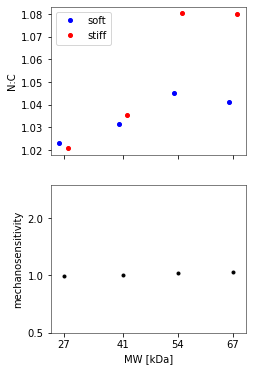

MWs [27, 41, 54, 67]
N2C soft [1.0231677274400752, 1.0314501442565418, 1.0451514379775824, 1.0409997280944192]
N2C stiff [1.020845137923721, 1.0356436813212326, 1.0803150241099972, 1.080084974394442]
mechano: [0.9977300011971982, 1.0040656711214224, 1.0336444890708452, 1.0375458756089875]




----
NLS match 1.3049468199999998 ms^-1


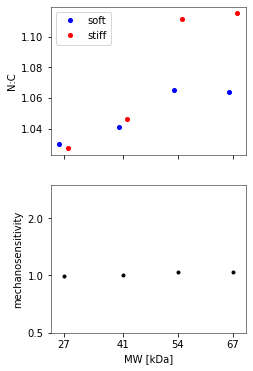

MWs [27, 41, 54, 67]
N2C soft [1.0301646753180145, 1.0410873214914889, 1.06517483137701, 1.0638637267589732]
N2C stiff [1.0271912242014007, 1.0464990161512844, 1.111240234980696, 1.1150831716685596]
mechano: [0.9971136157278002, 1.005198117917758, 1.0432468006628872, 1.0481447422459123]




----
NLS match 1.7028862 ms^-1


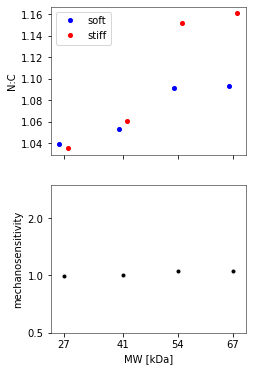

MWs [27, 41, 54, 67]
N2C soft [1.039237177729211, 1.053586292256624, 1.091171499142386, 1.0935632047675814]
N2C stiff [1.0354651026793897, 1.0606519977754647, 1.1515861607572913, 1.1607648664947394]
mechano: [0.9963703424678633, 1.0067063377444927, 1.0553667885042715, 1.0614520143272748]




----
NLS match 2.22217592 ms^-1


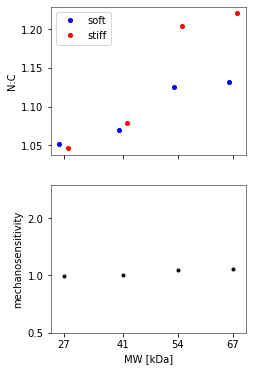

MWs [27, 41, 54, 67]
N2C soft [1.0509781847585469, 1.069766765653032, 1.124870420553343, 1.1320864162491502]
N2C stiff [1.0462494342777444, 1.079099348426936, 1.20421625532625, 1.2203912973665643]
mechano: [0.9955006197565472, 1.008723941585722, 1.070537755569993, 1.0780018908892022]




----
NLS match 2.8998214 ms^-1


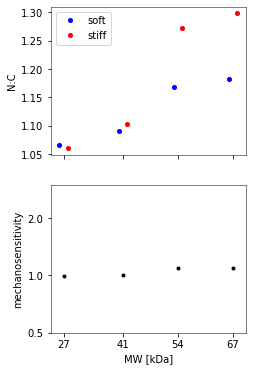

MWs [27, 41, 54, 67]
N2C soft [1.066134423019887, 1.0906625708089266, 1.1684638367468012, 1.1819604541816349]
N2C stiff [1.0603009047464775, 1.103135503874769, 1.2728578208182586, 1.2982156116042283]
mechano: [0.9945283463816076, 1.0114361062712471, 1.089342931110395, 1.098357907839722]




----
NLS match 3.78411271 ms^-1


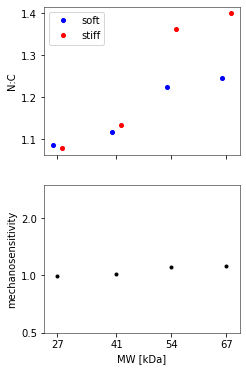

MWs [27, 41, 54, 67]
N2C soft [1.0856355458999154, 1.1175634176229452, 1.2247050299792104, 1.2463686461937966]
N2C stiff [1.078600733954064, 1.1344390326237932, 1.3623558848516482, 1.3997781162318403]
mechano: [0.993520097999352, 1.0151003645383654, 1.112395108620379, 1.123085148608745]




----
NLS match 4.93806584 ms^-1


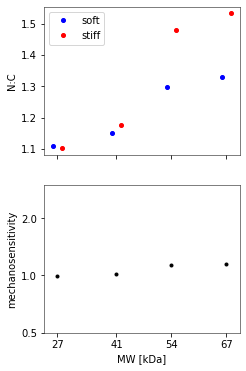

MWs [27, 41, 54, 67]
N2C soft [1.1106211801881445, 1.1520547981878189, 1.2970074445415507, 1.3292719265149744]
N2C stiff [1.1024188023018437, 1.1751823561821306, 1.4789948677743852, 1.5322810272389016]
mechano: [0.9926146034015746, 1.0200750502759863, 1.1403133220234993, 1.15272202524894]




----
NLS match 6.443913299999999 ms^-1


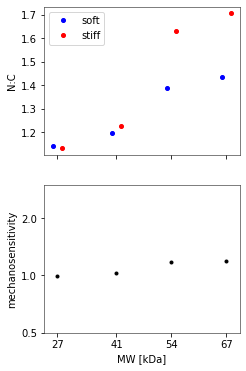

MWs [27, 41, 54, 67]
N2C soft [1.1424591825089903, 1.1960474215721768, 1.3895284950660447, 1.435515274630079]
N2C stiff [1.13339430835353, 1.2281697532416829, 1.6308995882633246, 1.7050548788432773]
mechano: [0.9920654721899538, 1.0268570719606436, 1.173707192083029, 1.1877650548042107]




----
NLS match 8.40896415 ms^-1


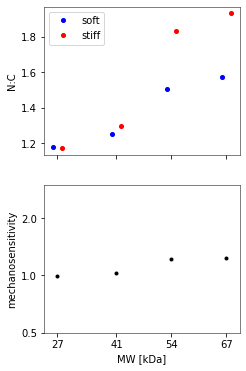

MWs [27, 41, 54, 67]
N2C soft [1.1827439496034884, 1.2517816950813723, 1.507208359779007, 1.57088424705819]
N2C stiff [1.1736359110510939, 1.2970086869777422, 1.8285232422076911, 1.9301214887608606]
mechano: [0.9922992304839539, 1.036130095266675, 1.2131854433688232, 1.2286847311477072]




----
NLS match 10.973251 ms^-1


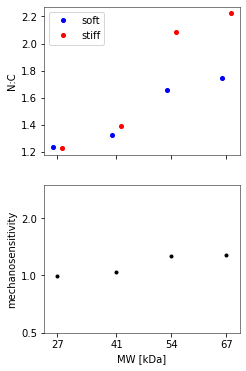

MWs [27, 41, 54, 67]
N2C soft [1.2332578748408711, 1.3217851482684422, 1.6557164222411216, 1.742054116199066]
N2C stiff [1.2258437911366762, 1.3863185764124928, 2.085220815403824, 2.2228426868501696]
mechano: [0.9939882129638526, 1.0488229333099939, 1.2594069777850847, 1.2759894576065878]




----
NLS match 14.319509 ms^-1


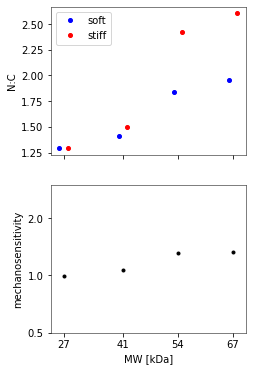

MWs [27, 41, 54, 67]
N2C soft [1.2958731072517113, 1.4087526894038744, 1.8412389262938778, 1.9563487198819158]
N2C stiff [1.2934544532194008, 1.5019782904913048, 2.417890873426673, 2.6026192506343633]
mechano: [0.9981335718607202, 1.0661759880131123, 1.3131869193605983, 1.3303452621634122]




----
NLS match 18.6861977 ms^-1


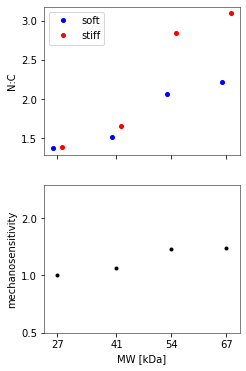

MWs [27, 41, 54, 67]
N2C soft [1.3723677005512844, 1.5153149285478178, 2.070030335225714, 2.2212103165090515]
N2C stiff [1.3808054678198547, 1.6514072308952508, 2.847648647876207, 3.093578055994803]
mechano: [1.0061483283708739, 1.0898112331526062, 1.3756555154858165, 1.3927443218689897]




----
NLS match 24.3844942 ms^-1


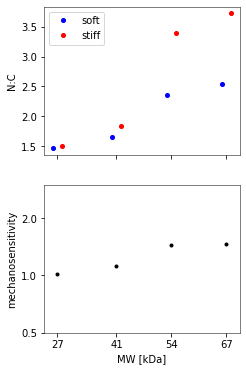

MWs [27, 41, 54, 67]
N2C soft [1.4641360028715429, 1.6436656850056588, 2.3476654184186896, 2.5433004758511637]
N2C stiff [1.493310212611465, 1.8438620936611996, 3.4004722043722113, 3.725174850322647]
mechano: [1.0199258878155473, 1.121798739537993, 1.4484483937505277, 1.4647010393358837]




----
NLS match 31.8204681 ms^-1


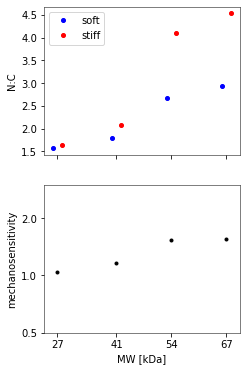

MWs [27, 41, 54, 67]
N2C soft [1.571796205951304, 1.7950461929375001, 2.677988033900137, 2.927233424683662]
N2C stiff [1.6376196035771253, 2.0907075935847756, 4.1077275791886, 4.5326439999235735]
mechano: [1.041877819386886, 1.1647096335517924, 1.5338857109104538, 1.5484395476296542]




----
NLS match 41.5240186 ms^-1


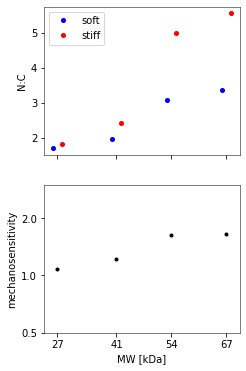

MWs [27, 41, 54, 67]
N2C soft [1.6947448796656812, 1.9691380581995204, 3.0618535316381035, 3.374082201417114]
N2C stiff [1.8217250745799203, 2.405576831097372, 5.0063457358291865, 5.5571257669653535]
mechano: [1.074925846620223, 1.2216394991100366, 1.6350702880130168, 1.6470036695108854]




----
NLS match 54.1866359 ms^-1


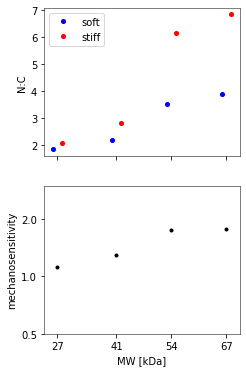

MWs [27, 41, 54, 67]
N2C soft [1.8307729253442524, 2.163493741620162, 3.495858355462592, 3.879913090420026]
N2C stiff [2.0549189661660723, 2.804262391134621, 6.137996854481959, 6.844754395071095]
mechano: [1.1224324642990184, 1.2961731005677006, 1.7557910619836152, 1.764151473385221]




----
NLS match 70.7106781 ms^-1


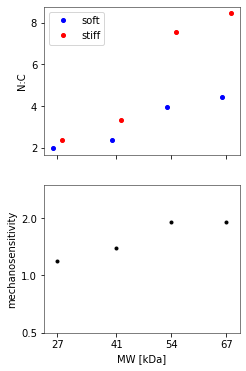

MWs [27, 41, 54, 67]
N2C soft [1.9759080315261957, 2.373199883419493, 3.971281718803058, 4.434584387742839]
N2C stiff [2.3474660079116694, 3.304048848798151, 7.545676464296189, 8.442639999781997]
mechano: [1.1880441652430966, 1.392233697583626, 1.9000607356988142, 1.9038176436820995]




----
NLS match 92.2736744 ms^-1


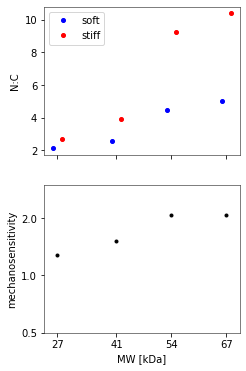

MWs [27, 41, 54, 67]
N2C soft [2.124630476967374, 2.590966377464185, 4.473436361900692, 5.020924740394461]
N2C stiff [2.70973632299794, 3.9219626344596943, 9.264671044099865, 10.387700473887326]
mechano: [1.2753918163057354, 1.5137064952182722, 2.071041207382562, 2.06888193131356]




----
NLS match 120.412238 ms^-1


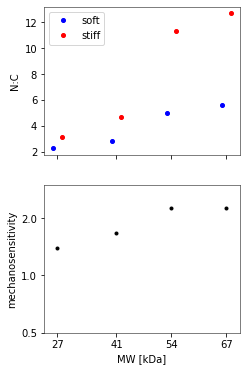

MWs [27, 41, 54, 67]
N2C soft [2.270481843358243, 2.8077082390780443, 4.981568562487022, 5.614342351338997]
N2C stiff [3.150368286669212, 4.670961452248802, 11.302663347513757, 12.681839157565713]
mechano: [1.3875329132822043, 1.6636206665770181, 2.2688964742203535, 2.258828971222453]




----
NLS match 157.131566 ms^-1


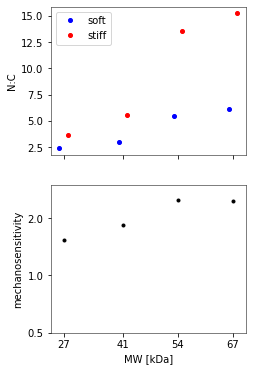

MWs [27, 41, 54, 67]
N2C soft [2.4068837137072965, 3.013446102370537, 5.469189485379264, 6.182735718675093]
N2C stiff [3.672658624163888, 5.552100835339649, 13.598940392771615, 15.241755274712498]
mechano: [1.5258978251620359, 1.8424423887893902, 2.486463566333831, 2.4652121598331354]




----
NLS match 205.048338 ms^-1


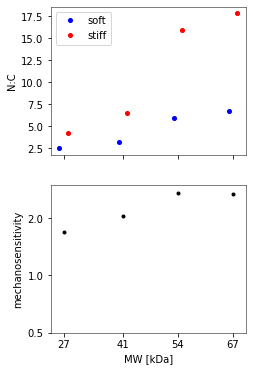

MWs [27, 41, 54, 67]
N2C soft [2.527819157177464, 3.1980908186937183, 5.903936767815558, 6.685675249733087]
N2C stiff [4.2674621872110485, 6.538271728361084, 15.941855029632144, 17.799697297828136]
mechano: [1.6881991637313374, 2.04442966101622, 2.700207616812026, 2.66236343120895]




----
NLS match 267.577176 ms^-1


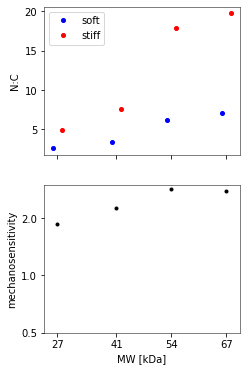

MWs [27, 41, 54, 67]
N2C soft [2.6279920814311213, 3.3514842625384405, 6.244566240922908, 7.069763769528529]
N2C stiff [4.898260967242296, 7.538440507081981, 17.806855849558882, 19.716865330887824]
mechano: [1.8638796523979089, 2.2492841727898516, 2.851576100332493, 2.788900163237379]




----
NLS match 349.173984 ms^-1


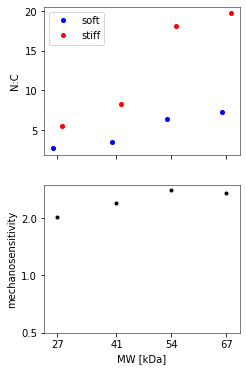

MWs [27, 41, 54, 67]
N2C soft [2.7020947335713155, 3.4618178867663647, 6.429873772476774, 7.253211132284281]
N2C stiff [5.466571038119506, 8.315160283724468, 18.10492659233356, 19.728453822898288]
mechano: [2.0230863745085745, 2.4019635219724234, 2.8157514801973442, 2.7199613334135955]




----
NLS match 455.65347899999995 ms^-1


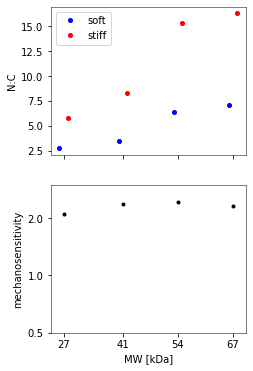

MWs [27, 41, 54, 67]
N2C soft [2.742594425409939, 3.5107352183017384, 6.349975760982208, 7.0882763124385795]
N2C stiff [5.737752194625614, 8.342616434846516, 15.371101630886862, 16.315502966803436]
mechano: [2.0920892062879424, 2.37631604666618, 2.420655166171733, 2.301758882927973]




----
NLS match 594.603558 ms^-1


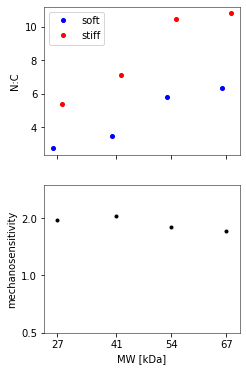

MWs [27, 41, 54, 67]
N2C soft [2.7345574617966695, 3.461702255974065, 5.815805249836422, 6.342010136197873]
N2C stiff [5.352306418236852, 7.099697269299968, 10.446023356745735, 10.790955144011146]
mechano: [1.9572843112685074, 2.050926609025256, 1.7961439401774235, 1.7015039257695797]




----
NLS match 775.92602 ms^-1


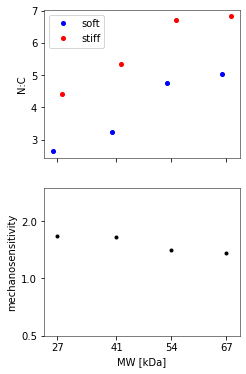

MWs [27, 41, 54, 67]
N2C soft [2.645806656982049, 3.246938711329925, 4.772851987229501, 5.046346177328616]
N2C stiff [4.420053561280244, 5.342584613512221, 6.707893632086868, 6.826071504577963]
mechano: [1.670588268275807, 1.645422069369438, 1.4054267029513734, 1.3526760283004367]




----
NLS match 1012.54219 ms^-1


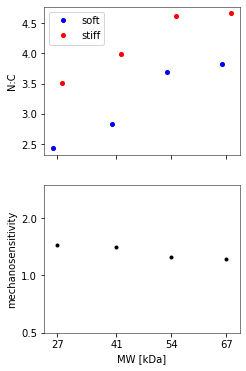

MWs [27, 41, 54, 67]
N2C soft [2.432555810272488, 2.8374160135607425, 3.6818617565442513, 3.81719834240535]
N2C stiff [3.5117283831565858, 3.9934939284370694, 4.609416275918766, 4.658084198727403]
mechano: [1.4436373333457915, 1.4074403997690619, 1.2519254064131689, 1.2202887513023966]




----
NLS match 1321.3137100000001 ms^-1


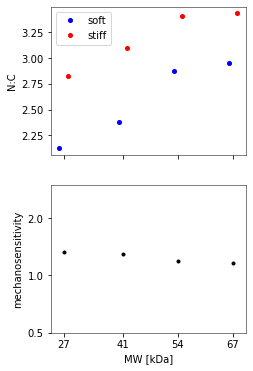

MWs [27, 41, 54, 67]
N2C soft [2.1268992201442627, 2.380080793887805, 2.876712727934412, 2.9535345234406085]
N2C stiff [2.8283478421884864, 3.0962901687062834, 3.4101772448012455, 3.433730652539033]
mechano: [1.3297987113825949, 1.300918093477225, 1.185442401560159, 1.1625835504164137]




----
NLS match 1724.24412 ms^-1


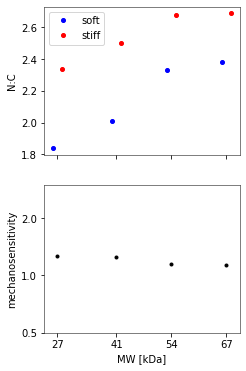

MWs [27, 41, 54, 67]
N2C soft [1.8392120813060546, 2.0090426099044656, 2.331966851070917, 2.3806170365923993]
N2C stiff [2.34029540788248, 2.498948070431075, 2.6745908781002616, 2.6873521500864226]
mechano: [1.2724445601839447, 1.243850209105274, 1.1469249131358794, 1.128846895060905]



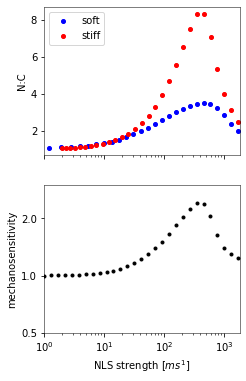

NLSs [1.00000000e-03 1.30494682e-03 1.70288620e-03 2.22217592e-03
 2.89982140e-03 3.78411271e-03 4.93806584e-03 6.44391330e-03
 8.40896415e-03 1.09732510e-02 1.43195090e-02 1.86861977e-02
 2.43844942e-02 3.18204681e-02 4.15240186e-02 5.41866359e-02
 7.07106781e-02 9.22736744e-02 1.20412238e-01 1.57131566e-01
 2.05048338e-01 2.67577176e-01 3.49173984e-01 4.55653479e-01
 5.94603558e-01 7.75926020e-01 1.01254219e+00 1.32131371e+00
 1.72424412e+00]
N2C soft [1.0314501442565418, 1.0410873214914889, 1.053586292256624, 1.069766765653032, 1.0906625708089266, 1.1175634176229452, 1.1520547981878189, 1.1960474215721768, 1.2517816950813723, 1.3217851482684422, 1.4087526894038744, 1.5153149285478178, 1.6436656850056588, 1.7950461929375001, 1.9691380581995204, 2.163493741620162, 2.373199883419493, 2.590966377464185, 2.8077082390780443, 3.013446102370537, 3.1980908186937183, 3.3514842625384405, 3.4618178867663647, 3.5107352183017384, 3.461702255974065, 3.246938711329925, 2.8374160135607425, 2.3800807

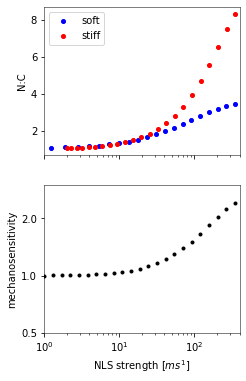

NLSs [1.00000000e-03 1.30494682e-03 1.70288620e-03 2.22217592e-03
 2.89982140e-03 3.78411271e-03 4.93806584e-03 6.44391330e-03
 8.40896415e-03 1.09732510e-02 1.43195090e-02 1.86861977e-02
 2.43844942e-02 3.18204681e-02 4.15240186e-02 5.41866359e-02
 7.07106781e-02 9.22736744e-02 1.20412238e-01 1.57131566e-01
 2.05048338e-01 2.67577176e-01 3.49173984e-01 4.55653479e-01
 5.94603558e-01 7.75926020e-01 1.01254219e+00 1.32131371e+00
 1.72424412e+00]
N2C soft [1.0314501442565418, 1.0410873214914889, 1.053586292256624, 1.069766765653032, 1.0906625708089266, 1.1175634176229452, 1.1520547981878189, 1.1960474215721768, 1.2517816950813723, 1.3217851482684422, 1.4087526894038744, 1.5153149285478178, 1.6436656850056588, 1.7950461929375001, 1.9691380581995204, 2.163493741620162, 2.373199883419493, 2.590966377464185, 2.8077082390780443, 3.013446102370537, 3.1980908186937183, 3.3514842625384405, 3.4618178867663647, 3.5107352183017384, 3.461702255974065, 3.246938711329925, 2.8374160135607425, 2.3800807

In [19]:
from matplotlib import ticker
VERBOSE = False
plt.style.use('./my.mplstyle.txt')
NLSs =  df['rate_free_to_complex_per_sec'].unique()
if VERBOSE or True:
    print("NLSs [s^-1]: ", NLSs)
NLSs_subset = np.array([1.00000000e-03, 1.30494682e-03, 1.70288620e-03, 2.22217592e-03,
 2.89982140e-03, 3.78411271e-03, 4.93806584e-03, 6.44391330e-03,
 8.40896415e-03, 1.09732510e-02, 1.43195090e-02, 1.86861977e-02,
 2.43844942e-02, 3.18204681e-02, 4.15240186e-02, 5.41866359e-02,
 7.07106781e-02, 9.22736744e-02, 1.20412238e-01, 1.57131566e-01,
 2.05048338e-01, 2.67577176e-01, 3.49173984e-01, 4.55653479e-01,
 5.94603558e-01, 7.75926020e-01, 1.01254219e+00, 1.32131371e+00,
 1.72424412e+00 ])
N2C_by_NLS_yes = []
N2C_by_NLS_no = []
Mechano_by_NLS = []
for NLS in NLSs_subset:
    N2Cs_no = []
    N2Cs_yes = []
    Mechanos = []
    iNLS = np.argsort(np.abs(NLSs-NLS))[0]
    NLS_match = NLSs[iNLS]
    print(f"\n\n\n----\nNLS match {NLS_match*1e3} ms^-1")
    is_NLS = df['rate_free_to_complex_per_sec'] == NLS_match
    df_N2C = df[is_NLS].pivot(index='passive_rate', 
                                       columns='fraction_complex_NPC_traverse_per_sec', 
                                       values='N2C')
    x0 = 15.0
    x1 = 150.0
    ix0 = np.argsort(np.abs(df_N2C.columns - x0))[0]
    ix1 = np.argsort(np.abs(df_N2C.columns - x1))[0]
    for MW in MWs:
        y0 = get_passive_nuclear_molar_rate_per_sec(MW, is_force=False)
        y1 = get_passive_nuclear_molar_rate_per_sec(MW, is_force=True)
        iy0 = np.argsort(np.abs(df_N2C.index - y0))[0]
        iy1 = np.argsort(np.abs(df_N2C.index - y1))[0]
        if(MW > 50):
            iy1 = iy0
        no = df_N2C.iloc[iy0, ix0]
        yes = df_N2C.iloc[iy1, ix1]
        mechano = yes / no
        if VERBOSE:
            print("------")
            print(MW, y0, y1)
            print(f"Mechanosensitivity {mechano:.1f}")
            display(df_N2C.iloc[[iy0,iy1],[ix0,ix1]])
        N2Cs_no.append(no)
        N2Cs_yes.append(yes)
        Mechanos.append(mechano)
        if MW==41:
            N2C_by_NLS_no.append(no)
            N2C_by_NLS_yes.append(yes)
            Mechano_by_NLS.append(mechano)
    fig, ax = plt.subplots(2,1, figsize=(3.5,6), sharex= True)
    ax[0].plot(np.array(MWs)-1, N2Cs_no, 'bo', label = 'soft', markersize=4)
    ax[0].plot(np.array(MWs)+1, N2Cs_yes, 'ro', label = 'stiff', markersize=4)
    ax[0].set_ylabel("N:C")
    ax[0].legend(frameon=True)
    ax[1].plot(MWs, Mechanos, 'ko')
    ax[1].set_xlabel("MW [kDa]")
    ax[1].set_ylabel("mechanosensitivity")
    ax[1].set_ylim([0.5,3.0])
    ax[1].set_yscale('log')
    positions = [0.5, 1.0, 2.0, 4.0]
    ax[1].yaxis.set_major_locator(ticker.FixedLocator(positions))
    ax[1].yaxis.set_major_formatter(ticker.FixedFormatter(positions))
    ax[1].yaxis.set_minor_locator(ticker.FixedLocator([]))
    ax[1].yaxis.set_minor_formatter(ticker.FixedFormatter([]))
    ax[0].set_xticks(MWs)
    plt.show()
    print("MWs", MWs)
    print("N2C soft", N2Cs_no)
    print("N2C stiff", N2Cs_yes)
    print("mechano:", Mechanos)
    print()
    
for xmax in [None, 400.0]:
    fig, ax = plt.subplots(2,1, figsize=(3.5,6), sharex= True)
    ax[0].plot(NLSs_subset*1e3-1, N2C_by_NLS_no, 'bo', label = 'soft', markersize=4)
    ax[0].plot(NLSs_subset*1e3+1, N2C_by_NLS_yes, 'ro', label = 'stiff', markersize=4)
    ax[0].set_ylabel("N:C")
    ax[0].legend(frameon=True)
    ax[1].plot(NLSs_subset*1e3, Mechano_by_NLS, 'ko')
    ax[1].set_xlabel(r"NLS strength [$ms^1$]")
    ax[1].set_ylabel("mechanosensitivity")
    ax[1].set_ylim([0.5,3.0])
    ax[1].set_yscale('log')
    positions = [0.5, 1.0, 2.0, 4.0]
    ax[1].yaxis.set_major_locator(ticker.FixedLocator(positions))
    ax[1].yaxis.set_major_formatter(ticker.FixedFormatter(positions))
    ax[1].yaxis.set_minor_locator(ticker.FixedLocator([]))
    ax[1].yaxis.set_minor_formatter(ticker.FixedFormatter([]))
    ax[0].set_xlim(xmin=1.0, xmax=xmax)
    ax[0].set_xscale('log')
    plt.show()
    print("NLSs", NLSs_subset)
    print("N2C soft", N2C_by_NLS_no)
    print("N2C stiff", N2C_by_NLS_yes)
    print("mechano:", Mechano_by_NLS)
    print()


# Import/Export/I:E/Mechano

NLSs [s^-1]:  [1.00000000e-03 1.30494682e-03 1.70288620e-03 2.22217592e-03
 2.89982140e-03 3.78411271e-03 4.93806584e-03 6.44391330e-03
 8.40896415e-03 1.09732510e-02 1.43195090e-02 1.86861977e-02
 2.43844942e-02 3.18204681e-02 4.15240186e-02 5.41866359e-02
 7.07106781e-02 9.22736744e-02 1.20412238e-01 1.57131566e-01
 2.05048338e-01 2.67577176e-01 3.49173984e-01 4.55653479e-01
 5.94603558e-01 7.75926020e-01 1.01254219e+00 1.32131371e+00
 1.72424412e+00 2.25004688e+00 2.93619151e+00 3.83157377e+00
 5.00000000e+00]
NLS match 1.0 ms^-1
NLS match 1.3049468199999998 ms^-1
NLS match 1.7028862 ms^-1
NLS match 2.22217592 ms^-1
NLS match 2.8998214 ms^-1
NLS match 3.78411271 ms^-1
NLS match 4.93806584 ms^-1
NLS match 6.443913299999999 ms^-1
NLS match 8.40896415 ms^-1
NLS match 10.973251 ms^-1
NLS match 14.319509 ms^-1
NLS match 18.6861977 ms^-1
NLS match 24.3844942 ms^-1
NLS match 31.8204681 ms^-1
NLS match 41.5240186 ms^-1
NLS match 54.1866359 ms^-1
NLS match 70.7106781 ms^-1
NLS match 92.27367

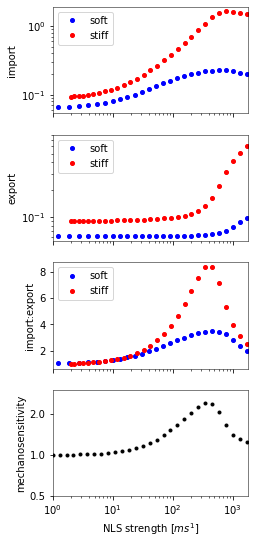

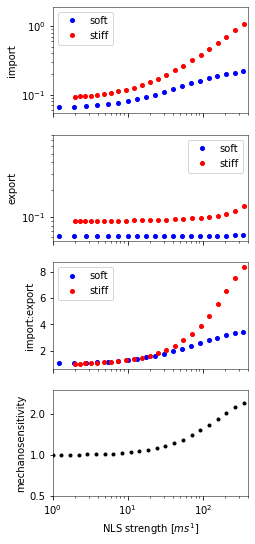

NLSs [1.00000000e-03 1.30494682e-03 1.70288620e-03 2.22217592e-03
 2.89982140e-03 3.78411271e-03 4.93806584e-03 6.44391330e-03
 8.40896415e-03 1.09732510e-02 1.43195090e-02 1.86861977e-02
 2.43844942e-02 3.18204681e-02 4.15240186e-02 5.41866359e-02
 7.07106781e-02 9.22736744e-02 1.20412238e-01 1.57131566e-01
 2.05048338e-01 2.67577176e-01 3.49173984e-01 4.55653479e-01
 5.94603558e-01 7.75926020e-01 1.01254219e+00 1.32131371e+00
 1.72424412e+00]
Soft {'import': [0.0627810475201012, 0.06337168391110631, 0.06413773958490196, 0.06512948174303732, 0.06641032570599698, 0.06805941485791735, 0.07017410278516512, 0.07287182182209728, 0.07629046861960856, 0.08058597847598305, 0.08592527524468856, 0.0924724952666637, 0.10036672678602723, 0.10969110267528312, 0.1204364499755138, 0.13246753769780428, 0.14550427651203413, 0.15913026813374193, 0.1728336106690854, 0.186071035599157, 0.1983331568635131, 0.20918264160027109, 0.21823605433052481, 0.22504569078407494, 0.22877810646202063, 0.22765791937633

In [23]:
from matplotlib import ticker
import copy
VERBOSE = False
PLOT_EACH = False
plt.style.use('./my.mplstyle.txt')
NLSs =  df['rate_free_to_complex_per_sec'].unique()
if VERBOSE or True:
    print("NLSs [s^-1]: ", NLSs)
NLSs_subset = np.array([1.00000000e-03, 1.30494682e-03, 1.70288620e-03, 2.22217592e-03,
 2.89982140e-03, 3.78411271e-03, 4.93806584e-03, 6.44391330e-03,
 8.40896415e-03, 1.09732510e-02, 1.43195090e-02, 1.86861977e-02,
 2.43844942e-02, 3.18204681e-02, 4.15240186e-02, 5.41866359e-02,
 7.07106781e-02, 9.22736744e-02, 1.20412238e-01, 1.57131566e-01,
 2.05048338e-01, 2.67577176e-01, 3.49173984e-01, 4.55653479e-01,
 5.94603558e-01, 7.75926020e-01, 1.01254219e+00, 1.32131371e+00,
 1.72424412e+00 ])
empty_stats = {'import':[],
            'export':[],
           'i2e':[]}
Yes_by_NLS = copy.deepcopy(empty_stats)
No_by_NLS = copy.deepcopy(empty_stats)
Mechanos_by_NLS = copy.deepcopy(empty_stats)
for NLS in NLSs_subset:
    No = copy.deepcopy(empty_stats)
    Yes = copy.deepcopy(empty_stats)
    Mechanos = copy.deepcopy(empty_stats)
    iNLS = np.argsort(np.abs(NLSs-NLS))[0]
    NLS_match = NLSs[iNLS]
    print(f"NLS match {NLS_match*1e3} ms^-1")
    is_NLS = df['rate_free_to_complex_per_sec'] == NLS_match
    df_import = df[is_NLS].pivot(index='passive_rate', 
                                       columns='fraction_complex_NPC_traverse_per_sec', 
                                       values='nuclear_import_per_sec')
    df_export = df[is_NLS].pivot(index='passive_rate', 
                                       columns='fraction_complex_NPC_traverse_per_sec', 
                                       values='nuclear_export_per_sec')    
    x0 = 15.0
    x1 = 150.0
    ix0 = np.argsort(np.abs(df_N2C.columns - x0))[0]
    ix1 = np.argsort(np.abs(df_N2C.columns - x1))[0]
    for MW in MWs:
        y0 = get_passive_nuclear_molar_rate_per_sec(MW, is_force=False)
        y1 = get_passive_nuclear_molar_rate_per_sec(MW, is_force=True)
        iy0 = np.argsort(np.abs(df_N2C.index - y0))[0]
        iy1 = np.argsort(np.abs(df_N2C.index - y1))[0]
        if(MW > 50):
            iy1 = iy0
        for Stats, ix, iy in zip([No,Yes], [ix0, ix1], [iy0, iy1]):
            Stats['import'].append( df_import.iloc[iy, ix] )
            Stats['export'].append( df_export.iloc[iy, ix] )
            Stats['i2e'].append( Stats['import'][-1] / Stats['export'][-1] )
        for category in empty_stats.keys():
            Mechanos[category].append(Yes[category][-1] / No[category][-1])
        if MW==41:
            for category in empty_stats.keys():
                No_by_NLS[category].append(No[category][-1])
                Yes_by_NLS[category].append(Yes[category][-1])
                Mechanos_by_NLS[category].append(Mechanos[category][-1])
    if PLOT_EACH:
        fig, ax = plt.subplots(4,1, figsize=(3.5,9), sharex= True)
        for i,category in enumerate(['import','export','i2e']):
            ax[i].plot(np.array(MWs)-1, No[category], 'bo', label = 'soft', markersize=4)
            ax[i].plot(np.array(MWs)+1, Yes[category], 'ro', label = 'stiff', markersize=4)
            ax[i].set_ylabel(category if category!='i2e' else 'import:export')
            ax[i].legend(frameon=True)
            ax[i].set_xticks(MWs)
            if category in ['import', 'export']:
                ax[i].set_yscale('log')  
            ax[i].set_ylim(ymax=1.1*max(max(Yes[category]),max(No[category])))
        ax[-1].plot(MWs, Mechanos[category], 'ko')
        ax[-1].set_xlabel("MW [kDa]")
        ax[-1].set_ylabel("mechanosensitivity")
        ax[-1].set_ylim([0.5,3.0])
        ax[-1].set_yscale('log')
        positions = [0.5, 1.0, 2.0, 4.0]
        ax[-1].yaxis.set_major_locator(ticker.FixedLocator(positions))
        ax[-1].yaxis.set_major_formatter(ticker.FixedFormatter(positions))
        ax[-1].yaxis.set_minor_locator(ticker.FixedLocator([]))
        ax[-1].yaxis.set_minor_formatter(ticker.FixedFormatter([]))
        plt.show()
        print("MWs", MWs)
        print("Soft", No)
        print("Stiff", Yes)
        print("mechano:", Mechanos)
        print()
    
    
      
for xmax in [None, 400.0]:
    fig, ax = plt.subplots(4,1, figsize=(3.5,9), sharex= True)
    for i,category in enumerate(['import','export','i2e']):
        ax[i].plot(NLSs_subset*1e3-1, No_by_NLS[category], 'bo', label = 'soft', markersize=4)
        ax[i].plot(NLSs_subset*1e3+1, Yes_by_NLS[category], 'ro', label = 'stiff', markersize=4)
        ax[i].set_ylabel(category if category!='i2e' else 'import:export')
        ax[i].legend(frameon=True)
        ax[i].set_xlim(xmin=1.0, xmax=xmax)
        ax[i].set_xscale('log')
        if category in ['import', 'export']:
            ax[i].set_yscale('log')
            ax[i].set_ylim(ymax=1.25*max(max(Yes[category]),max(No[category])))
    ax[-1].plot(NLSs_subset*1e3, Mechanos_by_NLS[category], 'ko')
    ax[-1].set_xlabel(r"NLS strength [$ms^1$]")
    ax[-1].set_ylabel("mechanosensitivity")
    ax[-1].set_ylim([0.5,3.0])
    ax[-1].set_yscale('log')
    positions = [0.5, 1.0, 2.0, 4.0]
    ax[-1].yaxis.set_major_locator(ticker.FixedLocator(positions))
    ax[-1].yaxis.set_major_formatter(ticker.FixedFormatter(positions))
    ax[-1].yaxis.set_minor_locator(ticker.FixedLocator([]))
    ax[-1].yaxis.set_minor_formatter(ticker.FixedFormatter([]))
    plt.show()
print("NLSs", NLSs_subset)
print("Soft", No_by_NLS)
print("Stiff", Yes_by_NLS)
print("Mechano:", Mechano_by_NLS)
print()

